In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [222]:
df = pd.read_csv(r'C:\Users\GOBIKRISHNAN\heart_failure_clinical_records_dataset.csv')

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [223]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42, stratify=y)

In [224]:
df.dropna()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [225]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [226]:
import seaborn as sns 

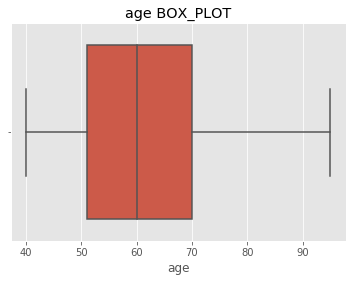

In [227]:
sns.boxplot(x = df['age'])
plt.title("age BOX_PLOT")
plt.show()

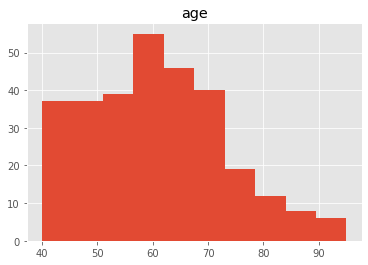

In [228]:
df['age'].hist()
plt.title('age')
plt.show()

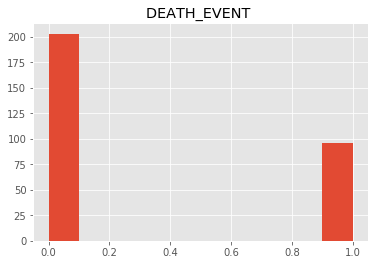

In [229]:
df['DEATH_EVENT'].hist()
plt.title('DEATH_EVENT ')
plt.show()

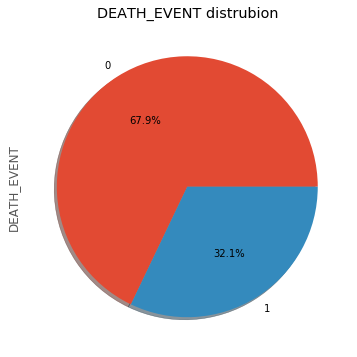

In [230]:
df['DEATH_EVENT'].value_counts().plot.pie(autopct = '%1.1f%%', shadow= True, figsize = (6, 6))
plt.title("DEATH_EVENT distrubion")
plt.show()

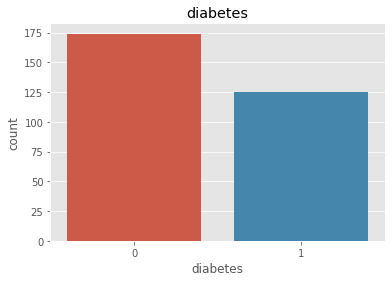

In [231]:
sns.countplot('diabetes',data = df )
plt.title("diabetes")
plt.show()

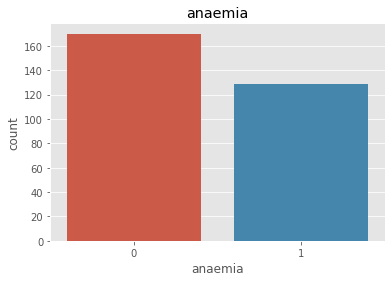

In [232]:
sns.countplot('anaemia',data = df )
plt.title("anaemia")
plt.show()

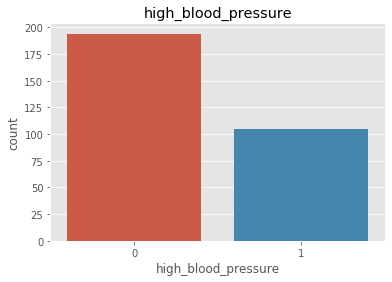

In [233]:
sns.countplot('high_blood_pressure',data = df )
plt.title("high_blood_pressure")
plt.show()

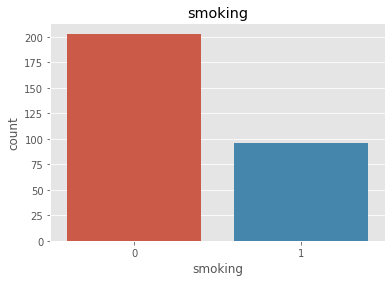

In [234]:
sns.countplot('smoking',data = df )
plt.title("smoking")
plt.show()

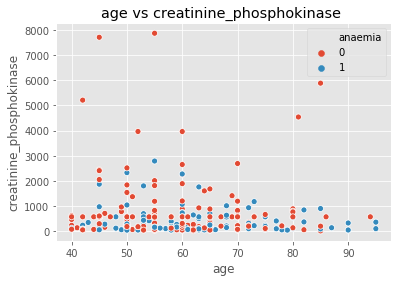

In [235]:
sns.scatterplot(data = df,x = 'age',y = 'creatinine_phosphokinase',hue = 'anaemia')
plt.title("age vs creatinine_phosphokinase ")

plt.show()

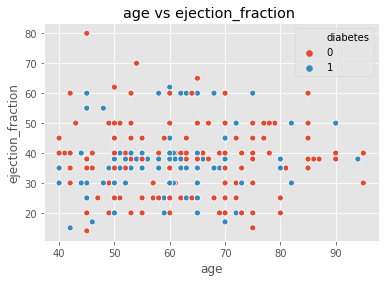

In [236]:
sns.scatterplot(data = df,x = 'age',y = 'ejection_fraction',hue = 'diabetes')
plt.title("age vs ejection_fraction ")
plt.show()

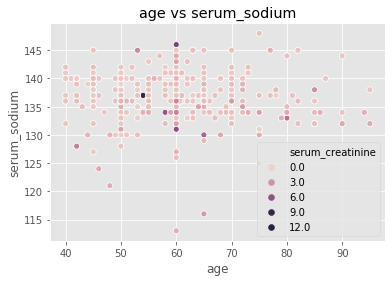

In [237]:
sns.scatterplot(data = df,x = 'age',y = 'serum_sodium',hue = 'serum_creatinine')
plt.title("age vs serum_sodium")
plt.show()

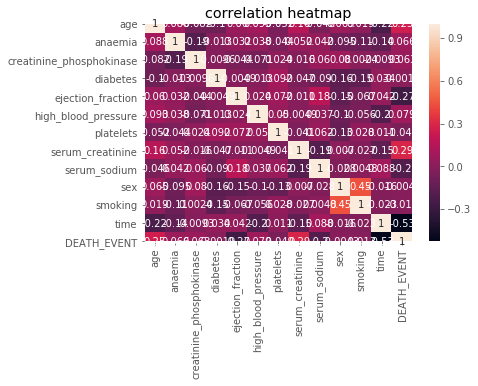

In [238]:
sns.heatmap(df.corr(), annot=True)
plt.title("correlation heatmap")
plt.show()

In [239]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [240]:
def euclid_dist(v1,v2):
    dist = np.sqrt(np.sum((v1-v2)**2))
    return dist

In [241]:
def knn_predict(X_train, X_test, y_train, y_test, k):
    
    # Counter to help with label voting
    from collections import Counter
    
    # Make predictions on the test data
    # Need output of 1 prediction per test data point
    y_hat_test = []

    for test_point in X_test:
        distances = []

        for train_point in X_train:
            distance = euclid_dist(test_point, train_point)
            distances.append(distance)
        
        # Storing distances in a dataframe
        df_dists = pd.DataFrame(data=distances, columns=['dist'], 
                                index=y_train)
        
        # Sort distances and considering the k closest points
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]

        # Create counter object to track the labels of k closest neighbors
        counter = Counter(y_train[df_nn.index])

        # Get most common label of all the nearest neighbors
        prediction = counter.most_common()[0][0]
        
        # Append prediction to output list
        y_hat_test.append(prediction)
        
    return y_hat_test
y_hat_test=knn_predict(X_train, X_test, y_train, y_test, 3)


In [242]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test,y_hat_test))

Accuracy: 0.30666666666666664


In [243]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    

In [244]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [245]:
 train_accuracy[i] = knn.score(X_train, y_train)

In [246]:
test_accuracy[i] = knn.score(X_test, y_test)

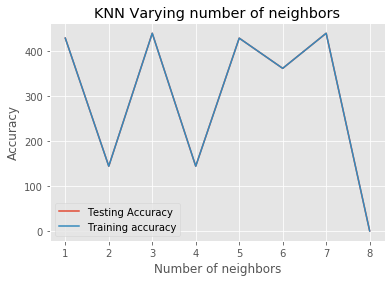

In [247]:
plt.title('KNN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()


In [248]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
print("Accuracy", knn.score(X_test,y_test)*100)
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy 76.0


Predicted,0,1,All
True,,,
0,50,1,51
1,17,7,24
All,67,8,75
